In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
os.chdir(module_path)

In [2]:
from train import train_stacking

/home/peter/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
from interface import *
from config import *
config_dict = getattr(config, 'config_catboost')
Model = config_dict['Model']
train_df, _, _ = load_full_data('config_catboost')

In [6]:
train_df, _, _ = load_full_data('config_catboost')

name: config_catboost
Model: <class 'models.CatBoost.CatBoost'>
before_fill: 1
original: 38
generated: 39
clean_na: True
training_params: {'model_params': {'iterations': 200, 'learning_rate': 0.03, 'depth': 6, 'l2_leaf_reg': 3, 'loss_function': 'MAE', 'eval_metric': 'MAE', 'random_seed': 42}, 'FOLDS': 3, 'outliers_lw_pct': 5, 'outliers_up_pct': 99}
tuning_params: {'parameter_space': {'model_params': {'iterations': <hyperopt.pyll.base.Apply object at 0x7f0a2dfacef0>, 'learning_rate': <hyperopt.pyll.base.Apply object at 0x7f0a2dfc7e10>, 'depth': <hyperopt.pyll.base.Apply object at 0x7f0a2dfd26a0>, 'l2_leaf_reg': <hyperopt.pyll.base.Apply object at 0x7f0a2dfd2940>, 'loss_function': 'MAE', 'eval_metric': 'MAE', 'random_seed': 42}, 'FOLDS': 3, 'outliers_up_pct': <hyperopt.pyll.base.Apply object at 0x7f0a2dfd2b00>, 'outliers_lw_pct': <hyperopt.pyll.base.Apply object at 0x7f0a2dfd2d30>}, 'max_evals': 100}
Feature engineering
Using cleaned prop


KeyboardInterrupt: 

In [7]:
val_pred, y_train, _ = train_stacking(train_df, Model, submit=False, **config_dict['training_params'])

Train df dimensions: (90275, 41)
(87427, 38) (87427,)
-0.1278 0.465444
(82208, 38) (82208,)
training...
Cat features are: ['airconditioningtypeid', 'buildingqualitytypeid', 'fips', 'heatingorsystemtypeid', 'propertylandusetypeid', 'regionidcity', 'regionidneighborhood', 'regionidzip', 'yearbuilt', 'fips_census_1', 'fips_census_block']
Cat features length is: 11
validating...
--------------------------------------------------------
(87428, 38) (87428,)
-0.1278 0.464838
(82228, 38) (82228,)
training...
Cat features are: ['airconditioningtypeid', 'buildingqualitytypeid', 'fips', 'heatingorsystemtypeid', 'propertylandusetypeid', 'regionidcity', 'regionidneighborhood', 'regionidzip', 'yearbuilt', 'fips_census_1', 'fips_census_block']
Cat features length is: 11
validating...
--------------------------------------------------------
(87428, 38) (87428,)
-0.1278 0.463538
(82210, 38) (82210,)
training...
Cat features are: ['airconditioningtypeid', 'buildingqualitytypeid', 'fips', 'heatingorsyste

In [ ]:
np.mean(abs(val_pred-y_train))

In [14]:
np.mean(abs(val_pred-y_train))

0.06487882516164575

In [25]:
def add_date_features(df):
    df["transaction_year"] = df["transactiondate"].dt.year
    df["transaction_month"] = df["transactiondate"].dt.month
    df["transaction_day"] = df["transactiondate"].dt.day
    df["transaction_quarter"] = df["transactiondate"].dt.quarter
#     df.drop(["transactiondate"], inplace=True, axis=1)
    return df

In [26]:
train_df = add_date_features(train_df)

In [27]:
del train_df['transaction_year']

In [9]:
train_df

,parcelid,logerror,transactiondate,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,...,yardbuildingsqft17,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,fips_census_1,fips_census_block,missing_value_count
0,11016594,0.0276,2016-01-01,1.0,2.0,3.0,4.0,2.0,1283.0,1684.0,...,270.0,1959.0,1.0,122754.0,360170.0,237416.0,6735.879883,60371064.0,6.037107e+13,27.0
1,14366692,-0.1684,2016-01-01,6.0,3.5,4.0,7.0,3.5,1283.0,2263.0,...,270.0,2014.0,1.0,346458.0,585529.0,239071.0,10153.019531,60590524.0,6.059053e+13,31.0
2,12098116,-0.0040,2016-01-01,1.0,3.0,2.0,4.0,3.0,1283.0,2217.0,...,270.0,1940.0,1.0,61994.0,119906.0,57912.0,11484.480469,60374640.0,6.037464e+13,27.0
3,12643413,0.0218,2016-01-02,1.0,2.0,2.0,4.0,2.0,1283.0,839.0,...,270.0,1987.0,1.0,171518.0,244880.0,73362.0,3048.739990,60372964.0,6.037296e+13,27.0
4,14432541,-0.0050,2016-01-02,6.0,2.5,4.0,7.0,2.5,1283.0,2283.0,...,270.0,1981.0,2.0,169574.0,434551.0,264977.0,5488.959961,60590424.0,6.059042e+13,27.0
5,11509835,-0.2705,2016-01-02,1.0,4.0,4.0,1.0,4.0,1283.0,3067.0,...,270.0,1982.0,1.0,880650.0,2447951.0,1567301.0,27126.570312,60376208.0,6.037621e+13,28.0
6,12286022,0.0440,2016-01-02,5.0,1.0,2.0,7.0,1.0,1283.0,1297.0,...,270.0,1939.0,1.0,64549.0,111521.0,46972.0,2304.969971,60375416.0,6.037542e+13,29.0
7,17177301,0.1638,2016-01-02,6.0,2.5,3.0,7.0,2.5,853.0,1763.0,...,270.0,1994.0,2.0,107000.0,306000.0,199000.0,3745.500000,61110032.0,6.111003e+13,27.0
8,14739064,-0.0030,2016-01-02,6.0,1.0,2.0,7.0,1.0,1283.0,796.0,...,270.0,1984.0,1.0,66834.0,210064.0,143230.0,2172.879883,60590424.0,6.059042e+13,32.0
9,14677559,0.0843,2016-01-03,6.0,2.0,2.0,7.0,2.0,1283.0,1260.0,...,270.0,1977.0,1.0,109977.0,190960.0,80983.0,1940.260010,60590624.0,6.059063e+13,31.0


In [28]:
len(train_df.columns)

44

In [29]:
val_pred, y_train, _ = train_stacking(train_df, Model, submit=False, **config_dict['training_params'])

Train df dimensions: (90275, 44)
(87427, 41) (87427,)
-0.1278 0.465444
(82208, 41) (82208,)
training...
Cat features are: ['airconditioningtypeid', 'buildingqualitytypeid', 'fips', 'heatingorsystemtypeid', 'propertylandusetypeid', 'regionidcity', 'regionidneighborhood', 'regionidzip', 'yearbuilt', 'fips_census_1', 'fips_census_block', 'transaction_month', 'transaction_day', 'transaction_quarter']
Cat features length is: 14
validating...
--------------------------------------------------------
(87428, 41) (87428,)
-0.1278 0.464838
(82228, 41) (82228,)
training...
Cat features are: ['airconditioningtypeid', 'buildingqualitytypeid', 'fips', 'heatingorsystemtypeid', 'propertylandusetypeid', 'regionidcity', 'regionidneighborhood', 'regionidzip', 'yearbuilt', 'fips_census_1', 'fips_census_block', 'transaction_month', 'transaction_day', 'transaction_quarter']
Cat features length is: 14
validating...
--------------------------------------------------------
(87428, 41) (87428,)
-0.1278 0.463538

In [8]:
np.mean(abs(val_pred-y_train))

0.06490409753661165

In [42]:
import imp

In [40]:
import matplotlib.pyplot as pl

In [44]:
import matplotlib

In [45]:
imp.reload(matplotlib.pyplot)

<module 'matplotlib.pyplot' from '/home/peter/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [46]:
%matplotlib inline

(-0.5, 0.5)

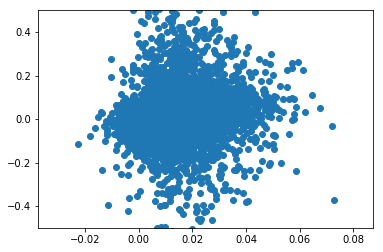

In [50]:
pl.scatter(val_pred, y_train)
pl.ylim([-0.5,0.5])